#### Name of the dataset:
AI Job Market & Salary Analysis 2025 Dataset

#### Source:
https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data

#### Main content:
Information about 15000+ AI roles job listings 

#### Main research questions:
- Which countries pay the most when starting a career in AI?
- What are the most requested skills to start a career in AI?
- Which countries have the biggest salary increases when you go from entry level to mid level? What about from mid level to senior?

#### Limitations:
The author extracted a considerable amount of job listings from a variety of sources, but no technique is mentioned as to guarantee that the sample is statistically significant. Also, even if the jobs are 15000+, the number of companies they refer to is small (16). 

#### Summary
This analysis of 15,000+ AI job listings in 2024-2025 shows:
- Switzerland, Denmark, and Norway offer the highest entry-level salaries.
- Python, SQL, and Tensorflow are the most requested skills.
- Salary progression is strongest in Northern Europe, with average jumps of $30,000–50,000 between levels.





### Data Overview 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [51]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [52]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [53]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

### Data cleaning 

Let's find anty outliers.

In [54]:
print(df['salary_usd'].describe())

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64


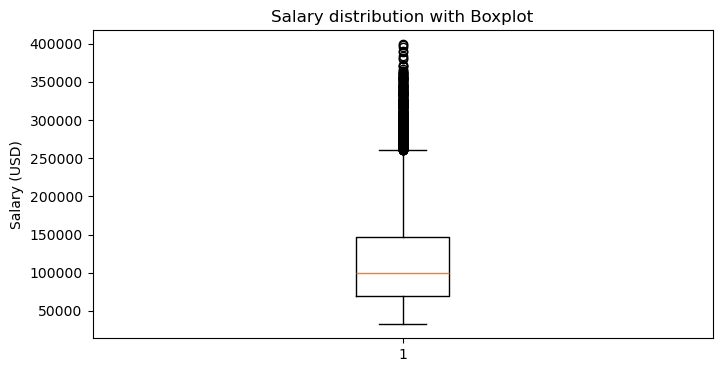

In [55]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['salary_usd'])
plt.title('Salary distribution with Boxplot')
plt.ylabel('Salary (USD)')
plt.show()

Based on this information we can already tell:
- Most salaries range from $50,000 and $150,000
- Many outliers above $200,000

Let's proceed with some winsorizing. Here's the original salary distribution.

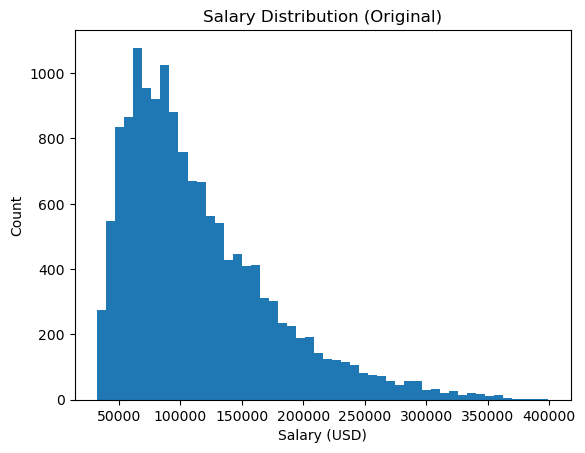

In [56]:
plt.hist(df['salary_usd'], bins=50)
plt.title("Salary Distribution (Original)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()

Let's consider a winsorizing of 5% on both ends. 

In [57]:
from scipy.stats.mstats import winsorize

df['salary_usd_wins'] = winsorize(
    df['salary_usd'], limits=[0.05, 0.05])

print(df['salary_usd_wins'].describe())

count     15000.000000
mean     113481.282667
std       53951.606890
min       46575.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      237987.000000
Name: salary_usd_wins, dtype: float64


/opt/anaconda3/envs/pyml/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


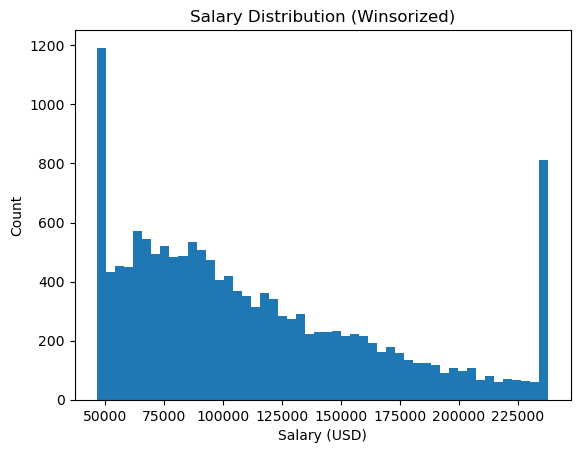

In [58]:
plt.hist(df['salary_usd_wins'], bins=50)
plt.title("Salary Distribution (Winsorized)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()

- The **median salary** remained stable at \$99,705
- The **mean salary** decreased slightly from \$115,349 to \$113,481 after winsorizing
- The **standard deviation** reduced from \$60,261 to \$53,952, reflecting a less extreme spread after trimming outliers.
- Winsorizing capped extreme salaries beyond the 5th and 95th percentiles, reducing their influence while keeping all data points.

This approach ensures a more stable analysis of salaries.


Let's convert the dates to pandas **datetime** objects

In [59]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

In [60]:
#checking if there were any problems parsing the dates 
print(df['posting_date'].isna().sum(), "missing posting_date")
print(df['application_deadline'].isna().sum(), "missing application_deadline")


0 missing posting_date
0 missing application_deadline


### Top job titles

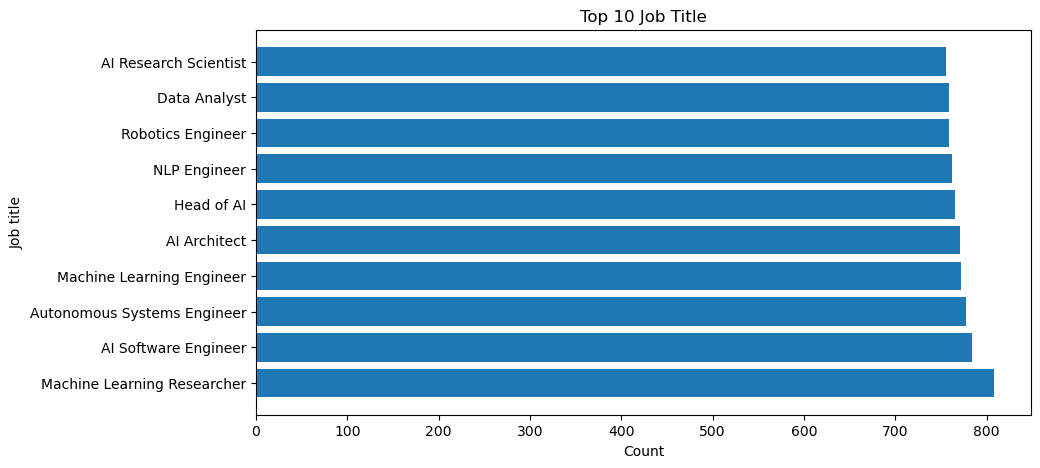

In [61]:
top_titles = df['job_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.barh(top_titles.index, top_titles.values)
plt.title('Top 10 Job Title')
plt.xlabel('Count')
plt.ylabel('Job title')
plt.show()

### Skills frequency 

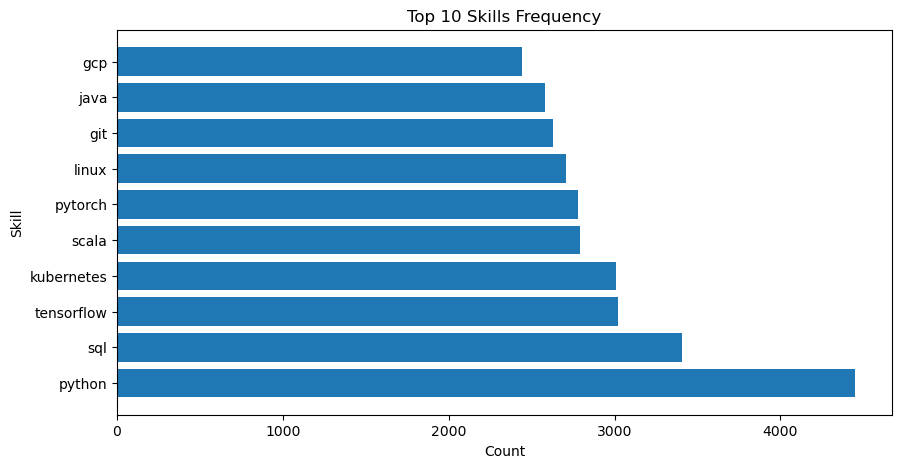

In [62]:
from collections import Counter

skills_list = df['required_skills'].dropna().str.split(',').sum()
skills_cleaned = [skill.strip().lower() for skill in skills_list]

skills_counts = Counter(skills_cleaned)
top_skills = dict(Counter(skills_cleaned).most_common(10))

plt.figure(figsize=(10,5))
plt.barh(list(top_skills.keys()), list(top_skills.values()))
plt.title('Top 10 Skills Frequency')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

### Question 1: Which countries pay the most when starting a career in AI?


In [63]:
entry_df = df[df['experience_level'] == 'EN']
print(df['experience_level'].unique())


['SE' 'EN' 'MI' 'EX']


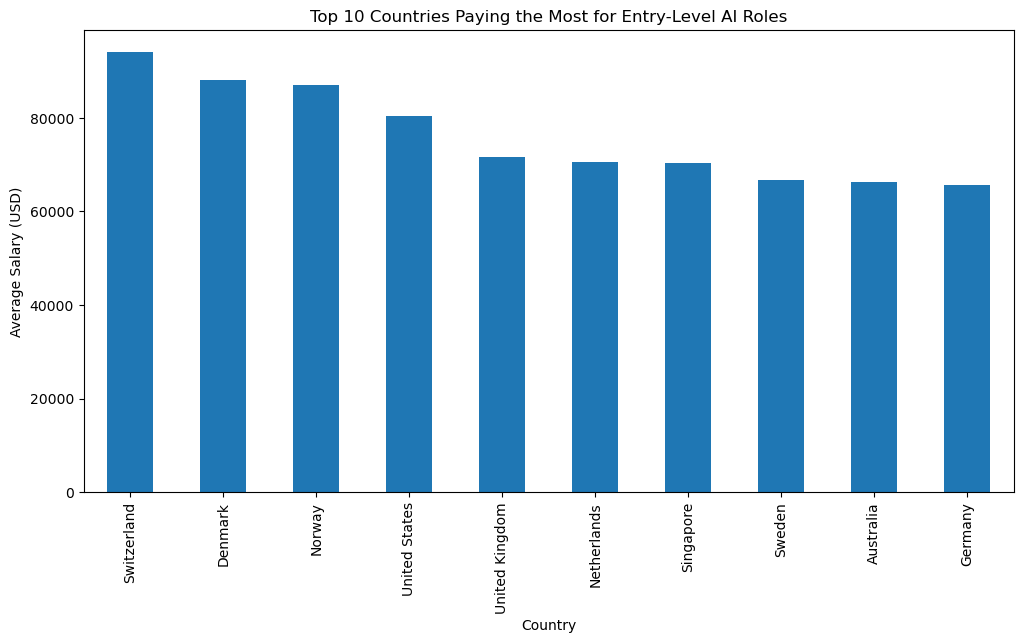

In [64]:
entry_salary_by_country = entry_df.groupby('company_location')['salary_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
entry_salary_by_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries Paying the Most for Entry-Level AI Roles')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.show()


According to the dataset, Switzerland, Denmark, and Norway offer the highest average entry-level salaries in AI. Again, limitations to take into account are: 

- The dataset may have sampling biases and may not reflect global reality.
- Cost of living differences are not adjusted here.

In [65]:
entry_counts = entry_df['company_location'].value_counts()
summary = entry_df.groupby('company_location')['salary_usd'].agg(['mean', 'count']).sort_values('mean', ascending=False)
# Rename columns for clarity
summary = summary.rename(columns={'mean': 'avg_salary_usd', 'count': 'num_entries'})
print(summary.head(10))


                  avg_salary_usd  num_entries
company_location                             
Switzerland         94053.788660          194
Denmark             88182.359756          164
Norway              86967.220994          181
United States       80344.103448          174
United Kingdom      71565.763736          182
Netherlands         70503.831522          184
Singapore           70273.600000          190
Sweden              66736.103825          183
Australia           66301.063725          204
Germany             65729.521505          186


Since the number of entries per country is fairly similar (all around ~170–200), the ranking is not dramatically affected by including the sample size; but even with similar sample sizes, the data may have collection or representation biases. 

### Question 2: What are the most requested skills to start a career in AI?

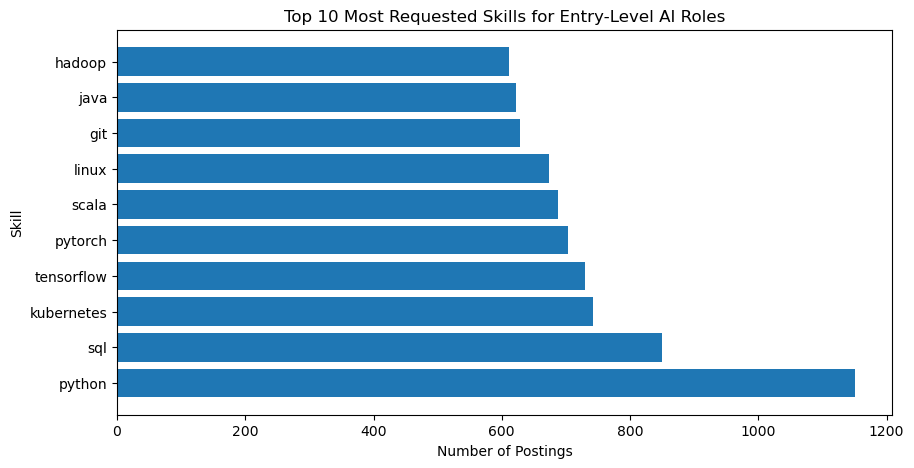

In [66]:
entry_df = df[df['experience_level'] == 'EN']
from collections import Counter

# split, clean, and flatten the list
skills_series = entry_df['required_skills'].dropna().str.split(',').sum()
skills_cleaned = [skill.strip().lower() for skill in skills_series]

skills_counts = Counter(skills_cleaned)
top_skills = dict(skills_counts.most_common(10))

# visualize
plt.figure(figsize=(10,5))
plt.barh(list(top_skills.keys()), list(top_skills.values()))
plt.title('Top 10 Most Requested Skills for Entry-Level AI Roles')
plt.xlabel('Number of Postings')
plt.ylabel('Skill')
plt.show()



### Question 3: Which countries have the biggest salary increases when you go from entry level to mid level? What about from mid level to senior?


In [67]:
print(df['experience_level'].unique())


['SE' 'EN' 'MI' 'EX']


In [68]:
exp_country_salary = df.pivot_table(
    values='salary_usd',
    index='company_location',
    columns='experience_level',
    aggfunc='mean'
)

exp_country_salary['entry_to_mid'] = exp_country_salary['MI'] - exp_country_salary['EN']
exp_country_salary['mid_to_senior'] = exp_country_salary['SE'] - exp_country_salary['MI']
print(exp_country_salary[['entry_to_mid']].sort_values('entry_to_mid', ascending=False).head(10))
print(exp_country_salary[['mid_to_senior']].sort_values('mid_to_senior', ascending=False).head(10))



experience_level  entry_to_mid
company_location              
Switzerland       39599.888589
Norway            34812.373123
Denmark           31435.130343
United States     29204.804160
Singapore         28770.466667
Sweden            28003.614925
Germany           27995.487423
United Kingdom    27180.348623
Netherlands       26990.451983
France            24509.222974
experience_level  mid_to_senior
company_location               
Denmark            50500.509901
Switzerland        49015.722751
Norway             47259.963893
United States      43719.249695
Singapore          39879.441270
Australia          39865.635048
United Kingdom     38433.491807
Sweden             36681.733882
Canada             36679.862477
Netherlands        36603.675797


### Salary Progression by Country: Entry → Mid → Senior

*Observations:*
- Switzerland and Norway show the strongest salary growth when moving from entry-level to mid-level roles, with increases around $35,000–$40,000 on average.
- Denmark and Switzerland stand out, with mid-to-senior jumps around $50,000.

*Limitations:*
- These figures are averages and do not account for cost of living differences.
- Sample size in each country and level combination should be considered when interpreting results.


